# *****Netflix Content Analysis*****
#### ***EDA and Hypothesis testing for Netflix Content***

## ***Problem statestatement*** 




Netflix offers a massive catalog of movies and TV shows, making it essential to analyze and understand the content landscape for strategic and user-centric decisions. This project aims to leverage **Exploratory Data Analysis (EDA)** and **hypothesis testing** to extract meaningful insights from the dataset. The key objectives include:

* **Identifying patterns and trends** in Netflix content based on variables such as genre, release year, country of production, and content type.
* **Comparing the characteristics** of movies vs. TV shows, including differences in duration, popularity, and distribution.
* **Assessing temporal trends**, such as how the volume and type of content have evolved over time.
* **Testing hypotheses** to validate assumptions — for example:

  * Are movies significantly longer in duration than TV shows (per episode)?
  * Is the number of shows produced in the U.S. higher than in other countries?
  * Has the diversity of genres increased in recent years?
* **Uncovering content distribution disparities** by region and genre to understand content localization or production focus.

By combining visual analysis with statistical testing, the project seeks to draw robust, data-supported conclusions that reflect how Netflix curates and evolves its streaming library.




## ***Let's Start the EDA***

In [1]:
#Import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import skew
from sklearn.decomposition import PCA
pd.set_option('display.max_rows', None) #so that large dataframes can be seen in output wholely

### *****1. Lets deep dive into the Dataset*****

In [3]:
# Read the dataset of "SCMS_Delivery_History_Dataset" in inp0 dataframe
inp0=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
#Display the first view of the dataframe (displays 5 records)
inp0.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# checking info of the dataframe
inp0.info(verbose = True)
print(inp0.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
(7787, 12)


- On close observation we can change the datatype for some columns like date_added.

In [6]:
# The datatype for 'date_added' column is changed to datetime64[ns] datatype.
inp0['date_added'] = pd.to_datetime(inp0['date_added'].str.strip(), format='mixed', errors='coerce')

In [7]:
print(inp0['date_added'].dtypes)

datetime64[ns]


### *****2. Identification of Duplicate columns and values*****

In [8]:
# Lets's make List to store pairs of duplicate columns
duplicate_columns = []

# Let's Get all column names from the DataFrame
columns = inp0.columns

# creating a Loop through each pair of columns to compare
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Checking if the two columns are exactly equal
        if inp0[columns[i]].equals(inp0[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

# Print results
if duplicate_columns:
    print("Duplicate columns found (having identical values):")
    for col1, col2 in duplicate_columns:
        print(f"{col1} and {col2}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [9]:
# Finding all rows that are duplicates of previous ones
duplicate_rows = inp0[inp0.duplicated()]

# Count total number of duplicate rows
duplicate_count = inp0.duplicated().sum()

# Print results
if duplicate_count > 0:
    print(f"Total duplicate rows found: {duplicate_count}\n")
    print("Duplicate Rows Preview:")
    print(duplicate_rows.head())  # Show a preview of duplicate rows
else:
    print("No duplicate rows found.")

No duplicate rows found.


- The dataset appears to be clean, with no duplicate rows or columns detected. This indicates that there are no repeated values affecting the structure of the data.

### *****3. Data Cleaning*****
-     Let's check for the missing values and treat them.

In [10]:
#checking for percentage of missing values in each column
inp0.isnull().sum()/len(inp0)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

- Here we can see that:
    - the column ***director*** has ***30.679337 %*** of the missing values. Let's check this in detaily.
    - the column ***cast*** has ***9.220496 %*** of the missing values. This can be filled with ***mode*** as it is ***object*** type datatype.
    - he column ***country*** has ***6.510851 %*** of the missing values. This can be filled with ***mode*** as it is ***object*** type datatype.
    - he column ***date_added*** has ***0.128419 %*** of the missing values. This can be filled with ***mode*** as it is ***object*** type datatype.
    - he column ***rating*** has ***0.089893 %*** of the missing values. This can be filled with ***mode*** as it is ***object*** type datatype.


##### ***Column "director"*** 

In [11]:
print(inp0['director'].describe())
print('****************************')
print(inp0['director'].value_counts().head(10))# Top 10 frequent directors
print('****************************')
print(inp0['director'].value_counts(normalize=True).head(10) * 100)
print('****************************')
print(inp0['director'].isnull().sum())

count                       5398
unique                      4049
top       Raúl Campos, Jan Suter
freq                          18
Name: director, dtype: object
****************************
director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64
****************************
director
Raúl Campos, Jan Suter    0.333457
Marcus Raboy              0.296406
Jay Karas                 0.259355
Cathy Garcia-Molina       0.240830
Youssef Chahine           0.222305
Martin Scorsese           0.222305
Jay Chapman               0.222305
Steven Spielberg          0.185254
David Dhawan              0.166728
Ryan Polito               0.148203
Name: proportion, dtype: float64
****************************
2389


- Upon close look up, we can see that ***Raúl Campos, Jan Suter*** is the highest occurrence in the whole column and total missing values is ***2389***.
- Here, what we can do is that we can fill it with ***Unknown*** in the place of missing values and then we can ***hide*** when we are analyzing. By doing this we won't loss any data and we'll get the analysis what we want.

In [12]:
inp0['director'] = inp0['director'].fillna('Unknown')
inp0['director'].isnull().sum()

0

##### ***Column "cast"*** 

In [13]:
# let's fill the missing values and then let's check for the null values again for the 'cast' cloumn. 
inp0['cast'] = inp0['cast'].fillna(inp0['cast'].mode()[0])
inp0['cast'].isnull().sum()

0

##### ***Column "country"*** 

In [14]:
# let's fill the missing values and then let's check for the null values again for the 'country' cloumn. 
inp0['country'] = inp0['country'].fillna(inp0['country'].mode()[0])
inp0['country'].isnull().sum()

0

##### ***Column "date_added"*** 

In [15]:
# let's fill the missing values and then let's check for the null values again for the 'date_added' cloumn. 
inp0['date_added'] = inp0['date_added'].fillna(inp0['date_added'].mode()[0])
inp0['date_added'].isnull().sum()

0

##### ***Column "rating"*** 

In [16]:
# let's fill the missing values and then let's check for the null values again for the 'country' cloumn. 
inp0['rating'] = inp0['rating'].fillna(inp0['rating'].mode()[0])
inp0['rating'].isnull().sum()

0

In [17]:
#checking for percentage of missing values again.
inp0.isnull().sum()/len(inp0)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

- There is no missing value present, so we can conclude that the data is ***clean*** and proceed with ***visualization***.

### *****4. Identification of Numerical and Categorical Columns*****

In [18]:
# Let's first check for the numerical cloumns and denote it  as 'num'.

num = inp0.select_dtypes(include='number').columns.tolist()
print(num)
print(len(num))

['release_year']
1


In [19]:
# Let's check for the categorical cloumns and denote it as 'cat'.

cat = inp0.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat)
print(len(cat))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description']
10


- Here, we can see there are total 1 column which is numerical and 10 categorical columns.

### *****5. Data Visualization*****
- Let's visualize with following steps:
    1. Outliers for ***Numerical columns***
    2. ***Univariate*** analysis
        - ***Univariate*** analysis for ***Numerical columns***
        - ***Univariate*** analysis for ***Categorical columns***
    3. ***Bivariate*** analysis
        - Categorical v/s Numerical
        - Numerical v/s Numerical
        - Categorical v/s Categorical
    4. ***Multivariate*** analysis

#### ***1. Outliers for Numerical columns***

##### ***<u>Chart 1. Histogram with Skewness for Numerical Column<u>***

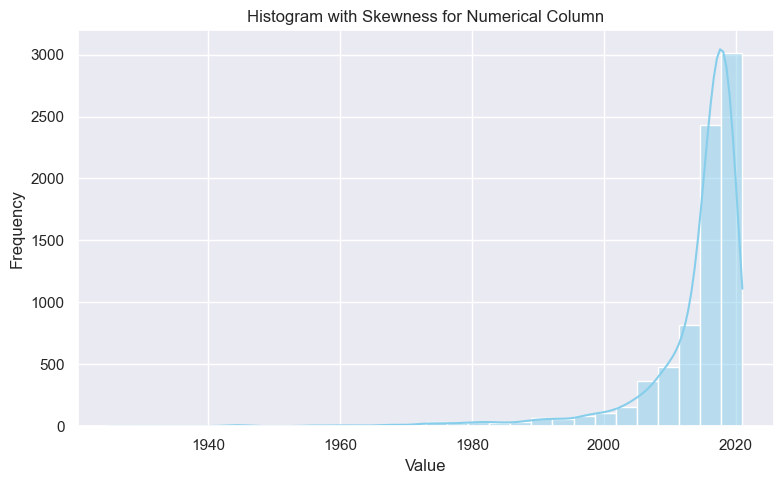

In [20]:
# Calculate skewness
data_skewness = skew(inp0['release_year'])

# Plot histogram using Seaborn for better aesthetics
plt.figure(figsize=(8, 5))
sns.histplot(inp0['release_year'], bins=30, kde=True, color='skyblue')

# Annotate skewness value on the plot
plt.title(f"Histogram with Skewness for Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig('Histogram with Skewness for Numerical Column', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()



**1. Why did you pick the specific chart?**

**Answer:**
I chose a **histogram with KDE (Kernel Density Estimation)** because it is the most effective way to **visualize the distribution** of a continuous numerical variable like 'release_year'. The histogram shows **how data is spread across time**, while the KDE line helps detect the **shape and skewness** of the distribution more smoothly. This chart is ideal for identifying **data concentration** and detecting **outliers** or **skewness**, which is crucial for further preprocessing steps like normalization or transformation.

---

**2. What is/are the insight(s) found from the chart?**

**Answer:**

* The 'release_year' column is **left-skewed (negatively skewed)**, as most of the values are clustered around recent years (2010–2020), and the tail stretches toward earlier years (before 2000).
* There's a **sharp increase in frequency** in the last two decades, indicating that a majority of the data comes from **recent releases**.
* Very few data points exist from before the 1980s, suggesting that **older records are rare** or less relevant in the dataset.
* This skewness may influence statistical models and requires **handling before analysis**, especially if models assume normality.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer:**
**Positive Impact:**

* Businesses can **focus their analysis on recent years**, as most of the content is recent. This can help in:

  * Targeting **modern consumer behavior**.
  * Prioritizing **newer content recommendation**.
  * Improving **forecasting models** by filtering out outdated data.

**Negative Impact:**

* If older data is ignored without proper evaluation, the model might **lose historical trends** or **seasonal patterns**.
* Highly skewed data can **bias statistical models**, leading to poor generalization unless corrected (e.g., via transformations or outlier handling).

**Actionable Step:** Consider using **IQR or transformation (like log/Box-Cox)** to handle skewness if modeling is the next step.

---

**4.** Since this data is ***not normally distributed***, ***Z-score*** is not appropriate, so I prefer to ***IQR method***. 

---

**5.** IQR works better with skewed data because it relies on medians and percentiles, not mean or standard deviation. It will effectively identify outliers in the left tail.


In [21]:
# Function to handle outliers using the IQR method
def handle_outliers_iqr(inp1, columns, cap=True):
    
    # Work on a copy to avoid modifying the original dataframe
    inp1_copy = inp1.copy()
    
    if cap:
        # Loop through each column to cap outliers
        for col in columns:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = inp1_copy[col].quantile(0.25)
            Q3 = inp1_copy[col].quantile(0.75)
            
            # Compute the Interquartile Range (IQR)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap values outside the bounds to the respective limits
            inp1_copy[col] = inp1_copy[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Return the modified dataframe with capped values
        return inp1_copy
    else:
        # Collect outlier rows from all columns
        outlier_rows = pd.DataFrame()
        
        for col in columns:
            # Calculate Q1, Q3, and IQR for the column
            Q1 = inp1_copy[col].quantile(0.25)
            Q3 = inp1_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find rows where values fall outside the IQR bounds
            outliers = inp1_copy[(inp1_copy[col] < lower_bound) | (inp1_copy[col] > upper_bound)]
            
            # Append to the collection of outlier rows
            outlier_rows = pd.concat([outlier_rows, outliers])
        
        # Drop duplicate rows that may appear across multiple columns
        return outlier_rows.drop_duplicates()



# Specify columns suspected to contain outliers
columns_with_outliers = ['release_year']

# Option 1: Cap outliers to IQR bounds
inp0_capped = handle_outliers_iqr(inp0, columns_with_outliers, cap=True)

# Option 2: Extract rows that contain outliers
outliers = handle_outliers_iqr(inp0, columns_with_outliers, cap=False)

# Display basic statistics after capping
print(inp0_capped[columns_with_outliers].describe())


       release_year
count   7787.000000
mean    2015.193335
std        4.453893
min     2005.500000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


##### ***<u>Chart 2. Box plot for treated outlier<u>***

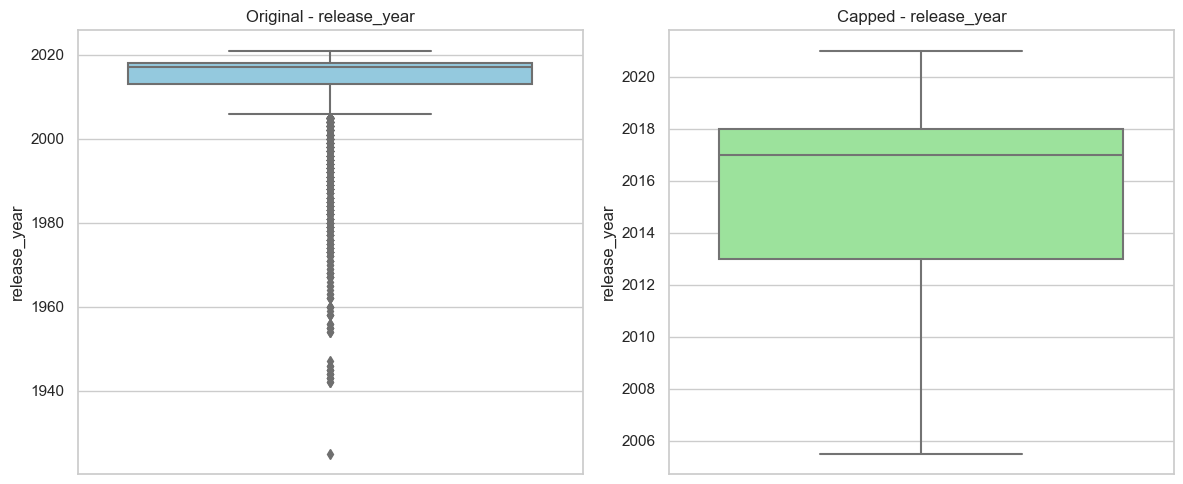

In [22]:

# Set visual style
sns.set(style="whitegrid")

# Create side-by-side boxplots
plt.figure(figsize=(12, 5))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=inp0['release_year'], color='skyblue')
plt.title('Original - release_year')

# Capped data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=inp0_capped['release_year'], color='lightgreen')
plt.title('Capped - release_year')

# Display the plots
plt.tight_layout()
plt.savefig('box plot for treated outlier.png', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()




**1. Why did you pick the specific chart?**

**Answer:**
The boxplot was chosen because it is effective for detecting outliers and visualizing the distribution and spread of the 'release_year' variable. It provides a clear comparison between the original data (with extreme outliers) and the capped version (after treating the outliers), which is essential for data cleaning and quality improvement.

---

**2. What is/are the insight(s) found from the chart?**

**Answer:**
* The **original plot** (left) shows a high concentration of values around recent years (post-2000), but also has significant outliers dating as far back as before 1940, indicating potential data entry errors or inconsistent data.
* The **capped plot** (right) displays a more reasonable range of years, likely capped between the 5th and 95th percentiles, which removes the extreme values while retaining meaningful variation.
* The interquartile range (IQR) in the capped data is tighter and more representative of the actual trend in release years.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer:** Yes, these insights can lead to **positive business impact**:

* **Improved data quality**: By identifying and capping outliers, models or reports using 'release_year' will be more reliable and less biased by erroneous data.
* **Better decision-making**: Clean, realistic release year values support accurate trend analysis (e.g., product launch performance over time).

No insights here directly lead to **negative growth**, but **ignoring the outliers** (as shown in the original chart) could have resulted in:

* Misleading conclusions about historical product trends.
* Poor performance of predictive models due to skewed feature distributions.



#### ***2. Univariate Analysis***

#### ***2.1 Univariate*** analysis for ***Numerical columns***

##### ***<u>Chart 3. Univariate Analysis of Release Year<u>***

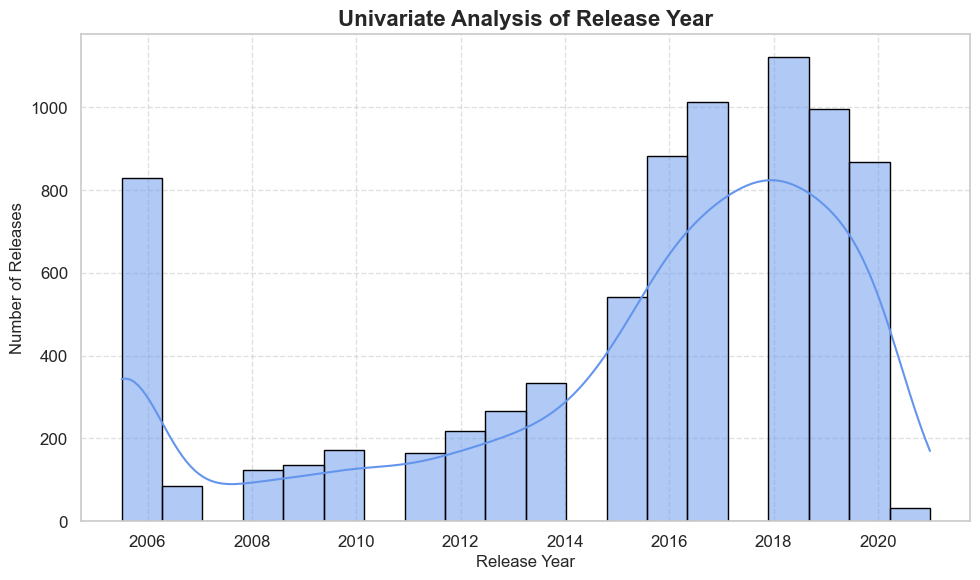

In [23]:
# Setting a clean and professional visual style
sns.set(style='whitegrid', font_scale=1.1)

# Create the plot figure
plt.figure(figsize=(10, 6))

# Histogram with KDE overlay for 'release_year'
sns.histplot(
    data=inp0_capped,
    x='release_year',
    bins=20,                      # Number of bins for histogram
    kde=True,                     # Enable KDE (smooth density curve)
    color='cornflowerblue',       # Histogram color
    edgecolor='black',            # Edge color of bars
   
)

# Add title and axis labels
plt.title('Univariate Analysis of Release Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)

# Customize tick marks
plt.xticks(rotation=0)           # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for readability

# Add tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.savefig('Univariate Analysis of Release Year.png', dpi = 900, transparent = False, bbox_inches = 'tight', pad_inches = 'layout')
plt.show()




**1. Why did you pick the specific chart?**

**Answer:** This bar chart with a KDE (Kernel Density Estimation) line is chosen because it effectively visualizes the **distribution of releases over the years**, making it easier to identify trends, peaks, and drops in the number of releases. A univariate analysis is suitable when analyzing the behavior of a single variable — in this case, **Release Year** — and this chart clearly conveys that.

---

**2. What is/are the insight(s) found from the chart?**

**Answer:**
* There was a **low number of releases between 2007 and 2011**, with a gradual increase starting in 2012.
* A **significant upward trend** is seen from 2013 onwards, peaking around **2018**, indicating a period of booming activity or content production.
* Post-2019, there is a **decline in the number of releases**, especially sharp in **2021**, likely due to external factors disrupting production.

---

**3. Will the gained insights help create a positive business impact?**

**Answer:** Yes, these insights can help guide strategic business decisions:

**Positive Impact:**

* The upward trend from 2013 to 2018 suggests a growing market or audience demand during this period. Businesses can analyze what genres, formats, or strategies worked during these years and replicate or evolve them.
* Identifying peak production years helps in **forecasting content trends** and aligning future production efforts to meet anticipated viewer interest.

**Negative Growth Insight:**

* The sharp **drop in 2021** is a red flag and likely points to production disruptions. This indicates a **vulnerability in the content pipeline**, and businesses should consider **contingency planning** for future crises to avoid such dips.

---

- Before heading to ***categorical*** analysis let's check the updated dataset that is ***inp0_capped*** where the ***outliers*** were treated.


In [24]:
# The new data set.
inp0_capped.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


- Upon close observation we can see that ***duration*** column has two different set of data, that is ***total number of seasons for a TV show*** and ***total duration of movie*** where it can seprated into two different columns. 

In [25]:
# Create new columns
inp0_capped['season'] = inp0_capped['duration'].where(inp0_capped['duration'].str.contains('Season')).fillna('-')
inp0_capped['duration'] = inp0_capped['duration'].where(inp0_capped['duration'].str.contains('min')).fillna('-')

In [26]:
inp0_capped.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020.0,TV-MA,-,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4 Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,-
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",-
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",-
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,-


In [27]:
# Let's check for the categorical cloumns in updated data set and denote it as 'cat1'.

cat1 = inp0_capped.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat1)
print(len(cat1))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description', 'season']
11


#### ***2.2 Univariate*** analysis for ***Categorical columns***

##### ***<u>Chart 4. Univariate Analysis of Release Year<u>***

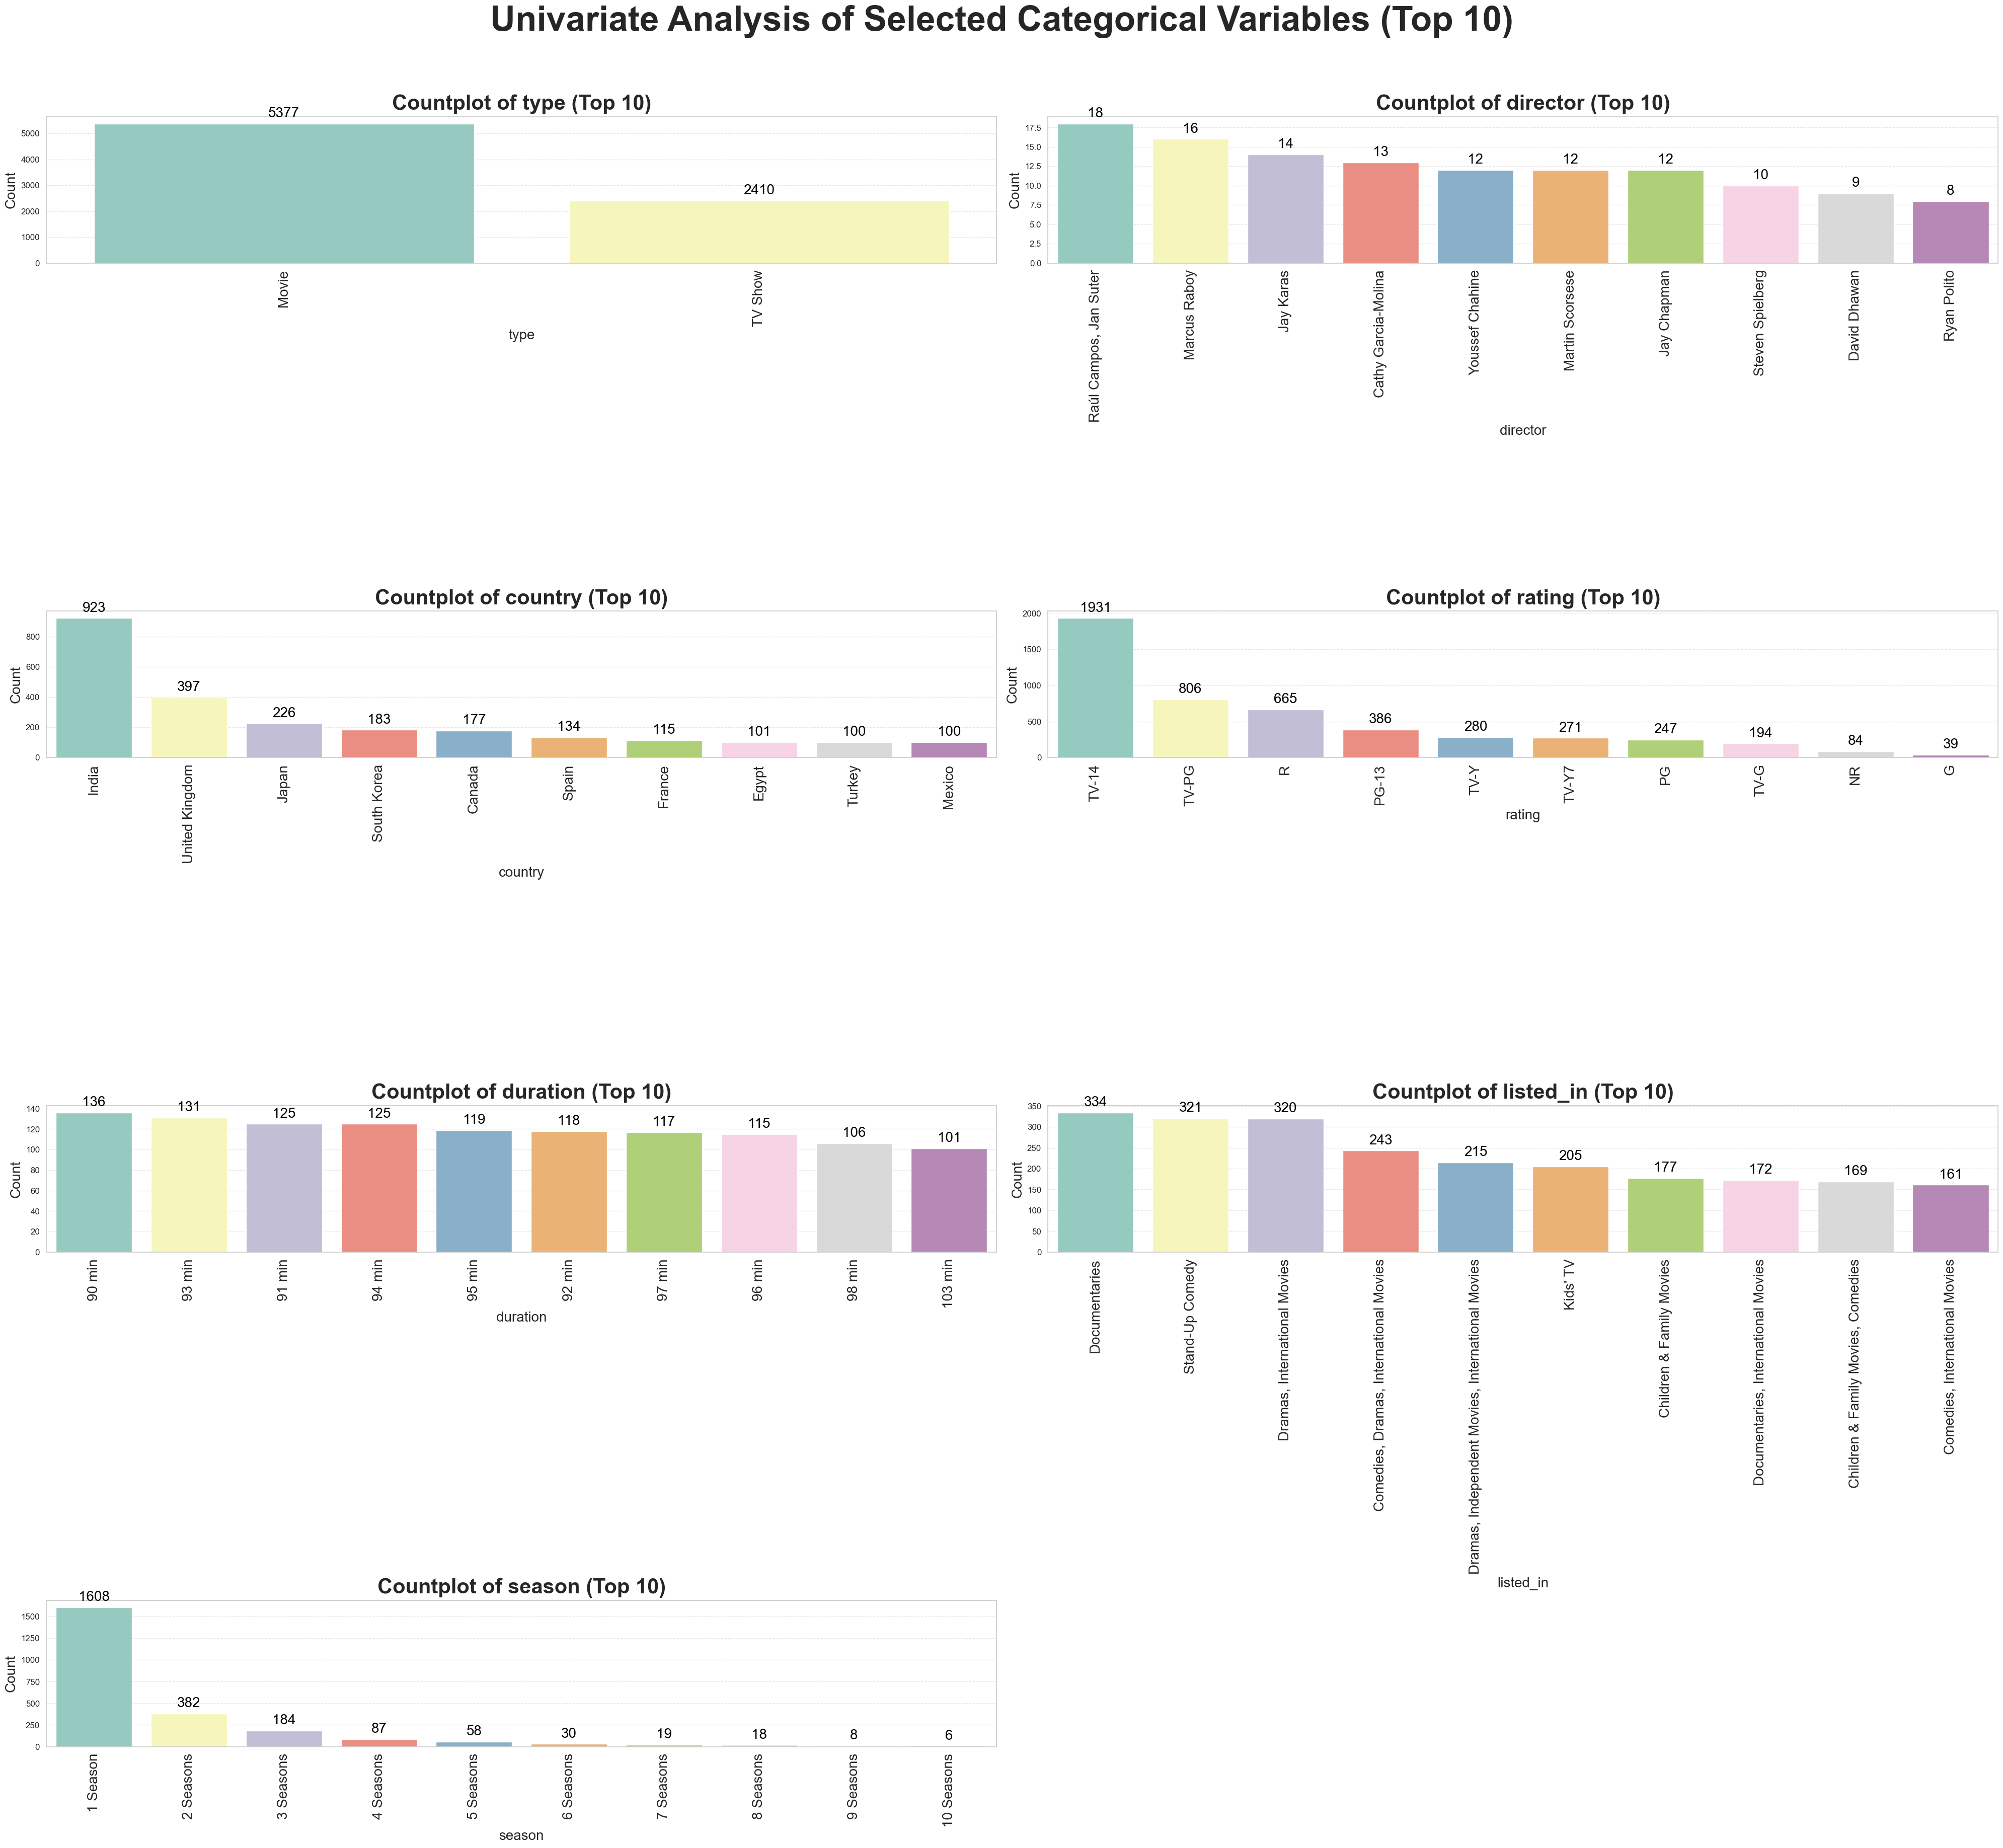

In [28]:
# Subplot grid for 7 selected variables
fig, axes = plt.subplots(4, 2, figsize=(40, 36))  # 4x2 grid
axes = axes.flatten()
plot_index = 0  # To track which subplot we're using

# Loop through the original cat list
for col in cat1:
    # Skip unwanted columns
    if col not in ['type', 'director', 'country', 'rating', 'duration', 'listed_in', 'season']:
        continue

    # Select axis for current plot
    ax = axes[plot_index]
    plot_index += 1

    # Work on a copy of the dataset
    data = inp0_capped.copy()

    # Hide "unknown" from 'director'
    if col == 'director':
        data = data[data[col].str.lower() != 'unknown']

    # Hide mode-filled values from specific columns
    if col in ['cast', 'country', 'date_added', 'rating']:
        mode_val = data[col].mode()[0]
        data = data[data[col] != mode_val]

    # Hide '-' from 'duration' and 'season'
    if col in ['duration', 'season']:
        data = data[data[col] != '-']

    # Filter for Top 10 categories
    top_categories = data[col].value_counts().nlargest(10).index
    data = data[data[col].isin(top_categories)]
    title_addon = " (Top 10)"

    # Plot countplot
    sns.countplot(
        data=data,
        x=col,
        palette='Set3',
        order=top_categories,
        ax=ax
    )

    # Annotate bar heights
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=20, color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Set plot formatting
    ax.set_title(f'Countplot of {col}{title_addon}', fontsize=30, fontweight='bold', pad=10)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(axis='x', rotation=90, labelsize=20)  # Set x-tick font size
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove any unused subplot axes
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle(
    'Univariate Analysis of Selected Categorical Variables (Top 10)',
    fontsize=50, fontweight='bold', y=1.02
)

# Final layout
plt.tight_layout()
plt.savefig('Univariate_Selected_Categorical_Top10.png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()



1. **Why did you pick the specific chart?**

**Answer:**
I selected this combined chart because it provides a **consolidated view of key categorical variables** in the dataset (such as ***type***, ***director***, ***country***, ***rating***, ***duration***, ***listed_in***, and ***season***). Each subplot represents the **distribution of the top 10 values** for a given category, allowing a **quick and comparative analysis** of content types, regional distribution, viewer ratings, and genre preferences. This helps uncover user behavior and content trends efficiently.

---

2. **What is/are the insight(s) found from the chart?**

**Answer:** Here are the key insights drawn from each plot:

* **Type**:
  *Movies (5377)* dominate over TV Shows (2410), suggesting that the platform’s content library is heavily tilted towards movies.

* **Director**:
  A small group of directors like *Raúl Campos* and *Jay Karas* appear most frequently, but the overall spread is diverse, indicating limited over-reliance on any single creator.

* **Country**:
  *India (903)* leads in content production, followed by the US and other countries. This suggests strong representation and possibly high demand for Indian content.

* **Rating**:
  *TV-MA (1931)* and *TV-14 (806)* are the most common ratings, pointing to a content strategy targeting mature audiences.

* **Duration**:
  The majority of popular durations fall within *80-100 mins*, confirming user preference for content with standard movie runtimes.

* **Listed\_in (Genre)**:
  Genres like *Documentaries*, *Stand-Up Comedy*, and *Drama* dominate, highlighting users' interest in informative and comedic content.

* **Season (for TV Shows)**:
  The vast majority of shows have only *1 season (1603)*, implying that many series are either new or not renewed beyond their first season.

---

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer:**
**Positive Business Impact:**

* **Content Focus**:
  Emphasizing movies, particularly those from India, aligns with user preference and regional demand—potentially increasing viewer retention and platform engagement.

* **Genre Strategy**:
  Prioritizing *Documentaries* and *Stand-Up Comedy* could attract niche audiences, leading to improved user satisfaction and market differentiation.

* **Targeted Age Ratings**:
  Since *TV-MA* and *TV-14* dominate, tailoring more content for mature viewers may increase watch time and subscription renewals.

 **Potential Negative Impact:**

* **Overdependence on 1-season shows**:
  A heavy skew toward *1-season* TV shows may reflect *low viewer retention or lack of content development*. Investing more in sequels or long-running series can help build fan loyalty.

* **Underrepresentation of family-friendly content**:
  The lower counts in ratings like *TV-Y* and *TV-G* indicate limited kid/family content, potentially alienating a significant viewer segment.



In [29]:
# Function to get top 10 categories
def get_top_10(inp0_capped, col):
    top10 = inp0_capped[col].value_counts().nlargest(10).index
    return inp0_capped[inp0_capped[col].isin(top10)]

#### ***3. Bivariate Analysis***

#### ***3.1 Bivariate*** analysis for ***Categorical v/s Numerical***

##### ***<u>Chart 5. Release Year vs Rating (Top 10 Ratings)<u>***

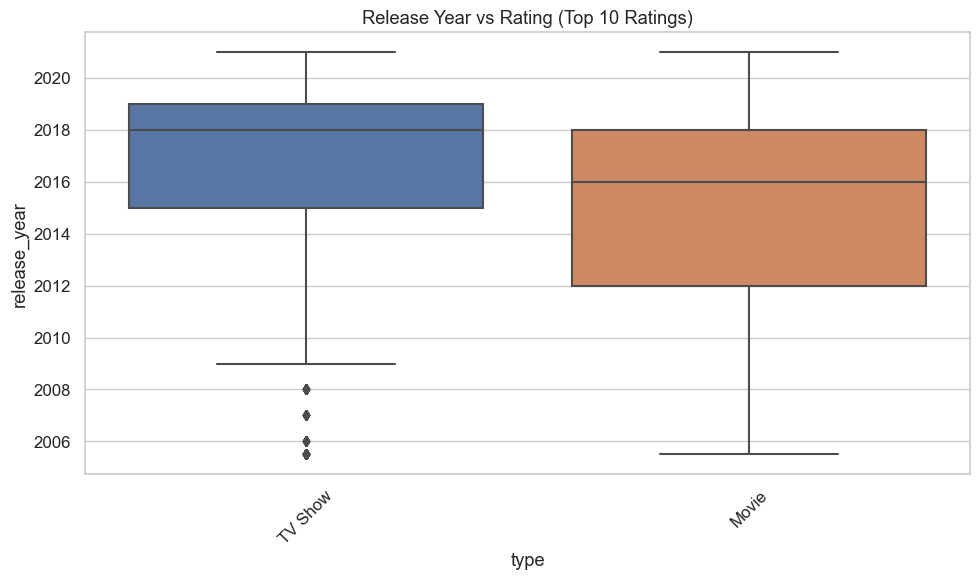

In [30]:
temp_inp0_capped = get_top_10(inp0_capped, 'type')
plt.figure(figsize=(10, 6))
sns.boxplot(data=temp_inp0_capped, x='type', y='release_year')
plt.title('Release Year vs Rating (Top 10 Ratings)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Release Year vs Rating (Top 10 Ratings).png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()



**1. Why did you pick the specific chart?**

**Answer :** I chose a boxplot because it effectively shows the distribution, median, and outliers of release years for the top 10 rated TV Shows and Movies. It helps compare how recent the highly rated content is across both types and highlights trends or gaps in release years.

---

**2. What is/are the insight(s) found from the chart?**

**Answer :** 
* Top-rated **TV Shows** are generally more recent, with a median release year around 2018.
* Top-rated **Movies** show a wider range of release years, including several older entries (as far back as 2005), with a median closer to 2016.
* TV Shows have more outliers on the lower end, indicating a few older yet highly rated shows.
* Overall, highly rated TV Shows are skewed toward newer releases compared to Movies.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer :** Yes, these insights can help create a **positive business impact**. For instance:

* Streaming platforms can prioritize producing or acquiring **newer TV Shows**, as they are more likely to achieve top ratings.
* The broader range in movie release years suggests that **classic or older movies** still hold value—content curation can include a mix of old and new.

No clear insight leads to negative growth. However, a **potential risk** is overinvesting in only newer content while ignoring the appeal of older, well-rated movies or shows. A balanced strategy is key.




##### ***<u>Chart 6. Release Year vs Country (Top 10 Countries)<u>***

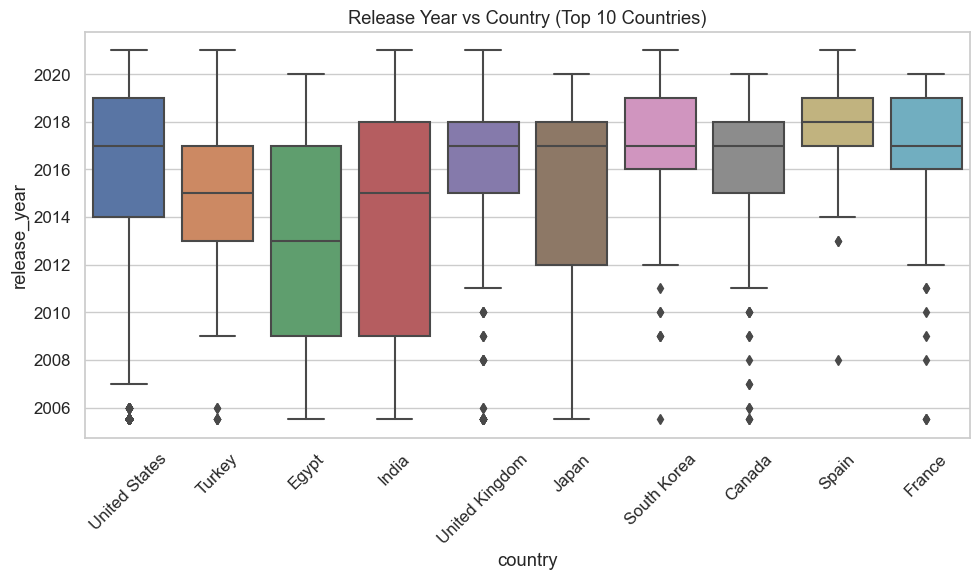

In [31]:
temp_inp0_capped = get_top_10(inp0_capped, 'country')
plt.figure(figsize=(10, 6))
sns.boxplot(data=temp_inp0_capped, x='country', y='release_year')
plt.title('Release Year vs Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Release Year vs Country (Top 10 Countries).png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()




**1. Why did you pick the specific chart?**

**Answer :**  I selected this boxplot to analyze the spread of release years of top-rated content by country. It effectively reveals differences in production trends, median release years, and the recency of successful content across major content-producing countries.

---

**2. What is/are the insight(s) found from the chart?**

**Answer :** 
* The **United States**, **France**, and **Spain** tend to have newer top-rated content with higher median release years around 2017–2018.
* Countries like **Egypt** and **India** have a broader range and older median years, indicating a mix of older and newer top-rated content.
* **South Korea** and **Canada** also show older outliers but maintain a strong presence in recent years.
* **Japan** displays a wide interquartile range, suggesting consistent top-rated production over time.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer :** Yes, the insights can guide **content acquisition and localization strategies**:

* Countries like the **United States, France, and Spain** are producing **recent high-performing content**, which could be a good investment for platforms aiming to license or promote fresh releases.
* Countries like **Egypt and India**, with older top-rated content, may benefit from **revamping classic hits or creating remakes** for renewed audience engagement.

There is **no direct sign of negative growth**, but relying heavily on countries with older median release years without investing in newer content could **limit competitiveness** in the fast-evolving entertainment market.




#### ***3.2 Bivariate*** analysis for ***Numerical v/s Numerical***

##### ***<u>Chart 7. Release Year vs Duration (Movies Only)<u>***

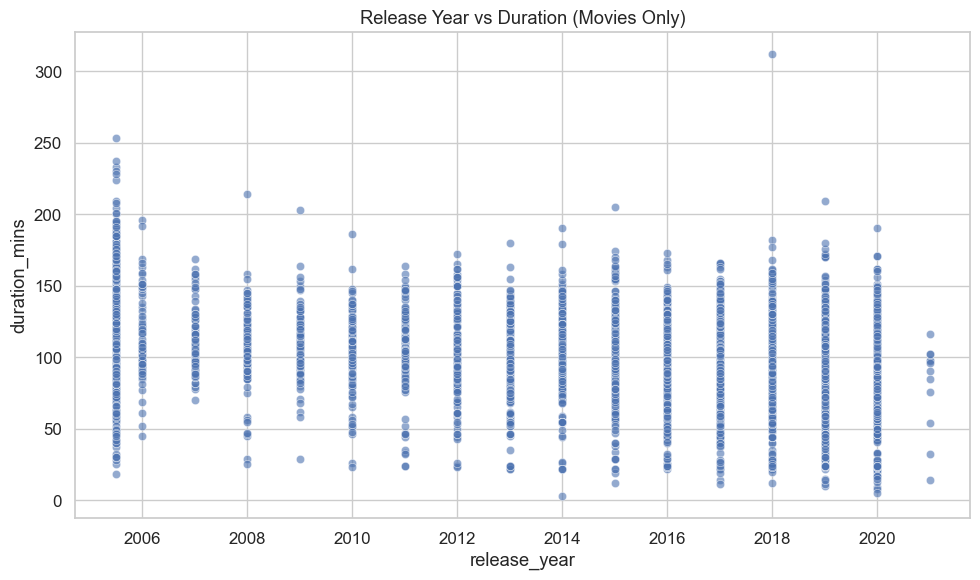

In [32]:
inp0_capped_movie = inp0_capped[inp0_capped['type'] == 'Movie'].copy()
inp0_capped_movie['duration_mins'] = inp0_capped_movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=inp0_capped_movie, x='release_year', y='duration_mins', alpha=0.6)
plt.title('Release Year vs Duration (Movies Only)')
plt.tight_layout()
plt.savefig('Release Year vs Duration (Movies Only).png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()




**1. Why did you pick the specific chart?**

**Answer :** This scatter plot was chosen to examine whether there is any trend or consistency in **movie durations over time**, helping us understand if newer movies tend to be longer, shorter, or similar in length compared to older ones.

---

**2. What is/are the insight(s) found from the chart?**

**Answer :**
* There is **no strong upward or downward trend** in average movie duration over time. Most movies, regardless of year, tend to cluster around **90 to 130 minutes**.
* Some outliers exist across all years, including extreme values over **250 minutes** and under **30 minutes**, but these are rare.
* After 2015, there appears to be **slightly more consistency and fewer extreme durations**, possibly due to standardized streaming formats.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer :** Yes, the insight helps in content strategy:

* Since most movies stay within a **90–130 minute range**, platforms can **optimize scheduling and storage** based on predictable durations.
* **Short-form content isn't growing significantly** in movie format; therefore, focusing efforts on mini-series or web shorts (instead of short films) might align better with changing viewer preferences.

There’s **no sign of negative growth**, but failing to diversify into short or long-form content for niche audiences may limit engagement opportunities.



#### ***3.1 Bivariate*** analysis for ***Categorical v/s Categorical***

##### ***<u>Chart 8. Distribution of Rating by Type (Top 10 Ratings)<u>***

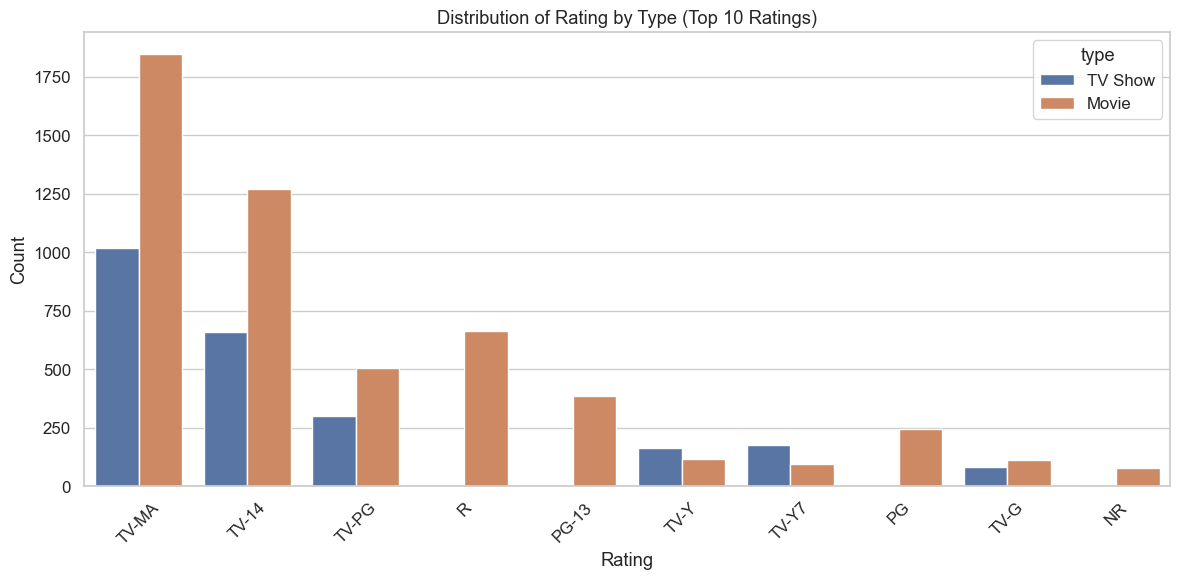

In [33]:
temp_inp0_capped = get_top_10(inp0_capped, 'rating')

plt.figure(figsize=(12, 6))
sns.countplot(data=temp_inp0_capped, x='rating', hue='type', order=temp_inp0_capped['rating'].value_counts().nlargest(10).index)
plt.title('Distribution of Rating by Type (Top 10 Ratings)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Rating by Type (Top 10 Ratings).png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()



**1. Why did you pick the specific chart?**

**Answer :** This chart helps to **compare how ratings differ between movies and TV shows**, which is important for understanding content suitability, audience targeting, and compliance with streaming regulations.

---

**2. What is/are the insight(s) found from the chart?**

**Answer :**
* **TV-MA (Mature Audience)** is the most common rating for both movies and TV shows, showing a strong focus on adult content.
* **Movies** significantly dominate in all top 10 ratings, especially **R**, **PG-13**, and **TV-14**, indicating a wider rating spread compared to TV shows.
* **TV shows** are most common in **TV-MA**, **TV-14**, and **TV-PG** ratings, with fewer falling under categories like **PG** or **NR**.
* **Kids' content** (TV-Y, TV-Y7, TV-G) is underrepresented in both formats, especially movies.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer :** Yes, the insights help guide **content acquisition and production strategy**:

* A platform targeting **adult viewers** can invest more confidently in **TV-MA** and **R-rated** content.
* There’s a **growth opportunity in children’s content**, especially for TV shows, as it's currently underrepresented.
* Ignoring PG or family-rated content may risk alienating broader audience segments (e.g., families, younger viewers), which could lead to **missed subscriber growth**.



##### ***<u>Chart 9. Content Type Distribution by Country (Top 10 Countries)<u>***

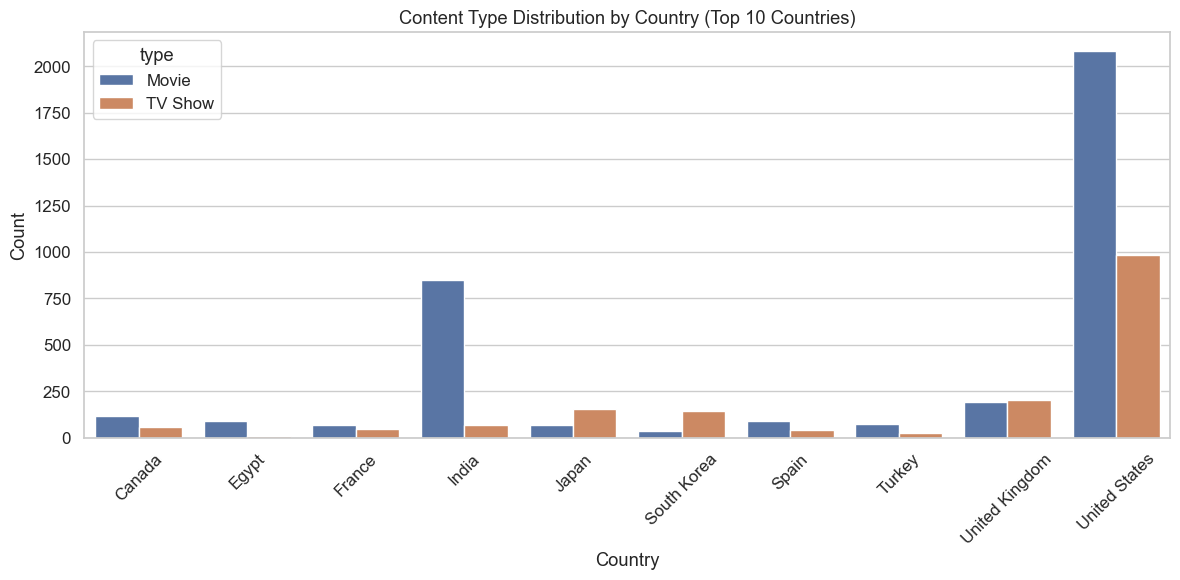

In [34]:
temp_inp0_capped = get_top_10(inp0_capped, 'country')
grouped = temp_inp0_capped.groupby(['country', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='country', y='count', hue='type')
plt.title('Content Type Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Content Type Distribution by Country (Top 10 Countries).png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()




**1. Why did you pick the specific chart?**

**Answer :** This chart clearly compares **how different countries contribute to the platform’s TV show and movie library**, which is useful for understanding global content sourcing.

---

**2. What is/are the insight(s) found from the chart?**

**Answer :**
* **The United States dominates** in both movies and TV shows, with **over 2000 movies and nearly 1000 TV shows**.
* **India** stands out for its **high volume of movies**, but relatively few TV shows.
* **Japan and South Korea** contribute more **TV shows** than movies, unlike most other countries.
* **United Kingdom** has a balanced output of both content types.
* Other countries like Canada, France, and Egypt contribute modestly to both, but mainly movies.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer :** Yes, these insights help in **regional content planning and licensing**:

* The **U.S. remains a central hub** and should be prioritized for content acquisition and partnerships.
* **South Korea and Japan are strong in TV content**, suggesting opportunity for deeper investment in **K-dramas and anime**, which are globally popular.
* The **imbalance in Indian TV content** indicates a potential **gap or market opportunity** to expand offerings beyond Bollywood movies.

Not acting on regional preferences could lead to **missed engagement or subscriber losses** in local and international markets.




#### ***4. Multivariate Analysis***

##### ***<u>Chart 10. Multivariate Correlation Heatmap<u>***

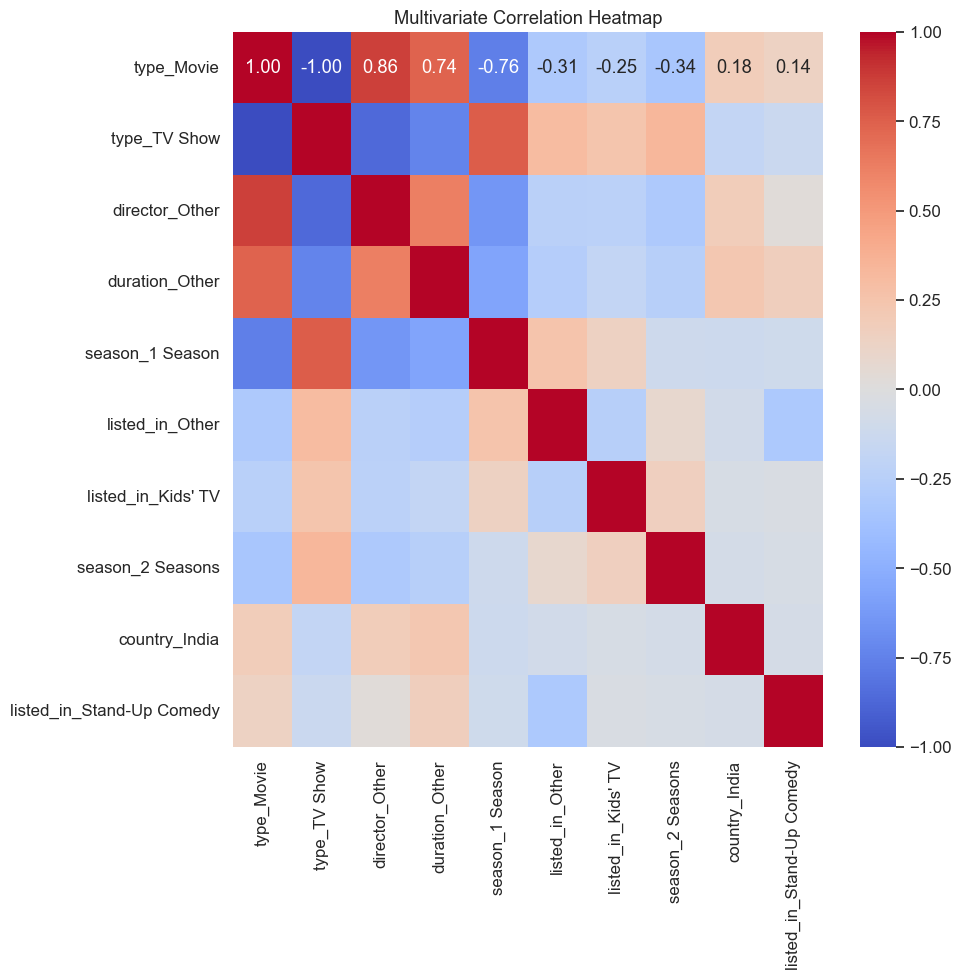

In [35]:
# Copy the original DataFrame (assume it's called inp0)
inp0_capped = inp0_capped.copy()

# Limit to top 10 for categorical columns
def top_10_encode(col):
    top_10 = inp0_capped[col].value_counts().nlargest(10).index
    return inp0_capped[col].apply(lambda x: x if x in top_10 else 'Other')

categorical_cols = ['type', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'season']

for col in categorical_cols:
    inp0_capped[col] = top_10_encode(col)

# Create a working copy for processing (same structure)
inp0_capped_processed = inp0_capped.copy()

# Hide "unknown" from 'director'
inp0_capped_processed.loc[inp0_capped_processed['director'].str.lower() == 'unknown', 'director'] = pd.NA

# Hide mode-filled values for specified columns (replace with missing)
for col in ['cast', 'country', 'date_added', 'rating']:
    mode_val = inp0_capped_processed[col].mode().iloc[0]
    inp0_capped_processed.loc[inp0_capped_processed[col] == mode_val, col] = pd.NA

# Hide '-' from 'duration' and 'season'
inp0_capped_processed.loc[inp0_capped_processed['duration'] == '-', 'duration'] = pd.NA
inp0_capped_processed.loc[inp0_capped_processed['season'] == '-', 'season'] = pd.NA

# One-hot encoding for categorical variables
inp0_capped_encoded = pd.get_dummies(inp0_capped_processed[categorical_cols])

# Add numeric columns
inp0_capped_encoded['release_year'] = inp0_capped['release_year']
inp0_capped_encoded['date_added'] = inp0_capped['date_added'].astype('int64')  # convert datetime to numeric

# Compute correlation
corr_matrix = inp0_capped_encoded.corr()

# Select top N features with highest correlation variance
corr_variance = corr_matrix.var().sort_values(ascending=False)
top_features = corr_variance.head(10).index

# Filter correlation matrix
filtered_corr = corr_matrix.loc[top_features, top_features]

# Plot filtered heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Multivariate Correlation Heatmap')
plt.tight_layout()
plt.savefig('Multivariate Correlation Heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()


**1. Why did you pick the specific chart?**

**Answer:**
The correlation heatmap was chosen because it is an effective way to analyze relationships between multiple categorical and numerical variables simultaneously. It allows for quick identification of strong correlations or inverse relationships, helping stakeholders understand patterns in the dataset without complex statistical output.

---

**2. What is/are the insight(s) found from the chart?**

**Answer:**

* ***type_Movie*** is **perfectly negatively correlated** with ***type_TV Show*** (-1.00), confirming that these are binary categories.
* ***type_Movie*** shows a **strong positive correlation** with ***director_Other*** (0.86) and ***duration_Other*** (0.74), indicating that movies are more likely to have varied durations and directors outside standard categories.
* ***type_TV Show*** has a **moderate positive correlation** with ***season_1 Season*** (0.76), suggesting that many TV shows in the dataset are single-season.
* ***type_TV Show*** has **weak negative correlations** with ***listed_in_Kids' TV*** (-0.25), ***season_2 Seasons*** (-0.34), and ***country_India*** (-0.18), implying these attributes are slightly less associated with TV shows.
* ***listed_in_Stand-Up Comedy*** has a **very weak or no significant correlation** with any variable, implying it might span both movies and TV shows equally or be an outlier category.

---

**3. Will the gained insights help in creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer:**
Yes, the insights can lead to **positive business impact** in the following ways:

* **Content Strategy Optimization:** Knowing that movies are often associated with "other" directors and duration types can help platforms better curate and categorize this content, improving user experience.
* **Recommendation Engine Tuning:** Correlations between content type and genres (e.g., TV shows with single seasons or Kids' content) can enhance the personalization algorithms for different viewer segments.
* **Market-Specific Strategies:** The weak negative correlation between TV Shows and Indian origin suggests an opportunity to increase TV show production or acquisition for the Indian market to close this gap.

There are **no strongly negative growth indicators**, but:

* The **low correlation between Indian content and TV Shows** might indicate a **content imbalance**, which, if unaddressed, may lead to underperformance in regional markets like India. Diversifying offerings based on regional demand could prevent this.




### *****6. Hypothesis Testing*****

In [36]:
# Extract relevant groups
movies = inp0_capped[inp0_capped['type'] == 'Movie']['release_year']
tv_shows = inp0_capped[inp0_capped['type'] == 'TV Show']['release_year']

# Perform independent t-test
t_stat, p_value = ttest_ind(movies, tv_shows, equal_var=False)

print("Hypothesis Testing Results:")
print('****************************')
print(f"T-statistic: {t_stat:.3f}")
print('****************************')
print(f"P-value: {p_value:.5f}")
print('****************************')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in release years.")
else:
    print("Fail to reject the null hypothesis: No significant difference in release years.")

Hypothesis Testing Results:
****************************
T-statistic: -20.456
****************************
P-value: 0.00000
****************************
Reject the null hypothesis: There is a significant difference in release years.


##### ***<u>Chart 11. Boxplot of Release Year by Content Type<u>***

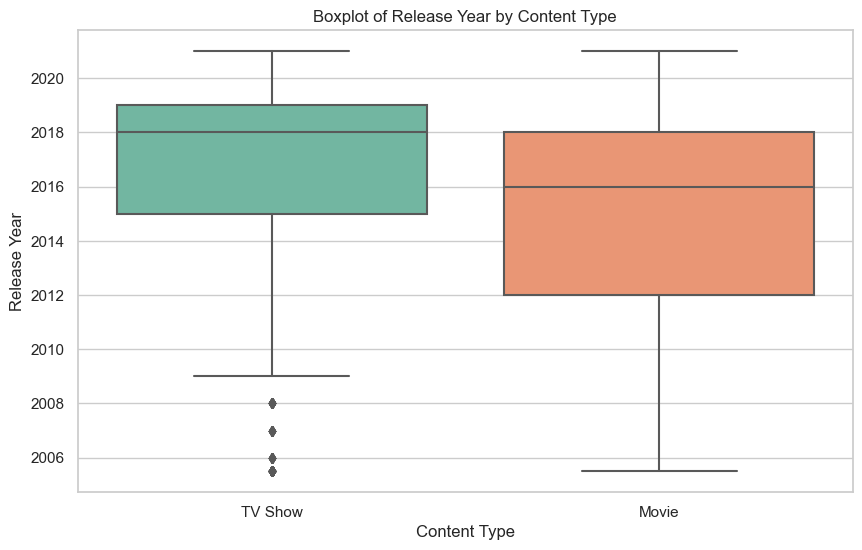

In [37]:
# Set visual style
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=inp0_capped, palette='Set2')
plt.title("Boxplot of Release Year by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Release Year")
plt.savefig('Boxplot of Release Year by Content Type.png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()






**1. Why did you pick the specific chart?**

**Answer:**
The boxplot was selected because it visually compares the distribution of release years for Movies and TV Shows, showing medians, interquartile ranges, and outliers. This makes it an effective tool for spotting differences in release trends over time and supports statistical interpretation alongside the t-test.

---

**2. What is/are the insight(s) found from the chart?**

**Answer:**

* **TV Shows** tend to have **more recent release years**, with a higher median around 2018 compared to Movies, whose median is around 2016.
* **TV Shows** have fewer older entries (fewer data points before 2010), suggesting a newer trend in episodic content.
* **Movies** show a broader spread and include more older content, dating back to around 2005.
* The **t-test yielded a p-value < 0.05**, which confirms **a statistically significant difference** in the release years between Movies and TV Shows.

---

 **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer:**
**Positive Business Impact:**

* The insights can inform **content acquisition strategies**. Since TV Shows are generally newer, platforms may prioritize **exclusive or trending series** to attract binge-watchers.
* Knowing that Movies cover a broader time span, businesses can **promote classic or nostalgic movie collections** to appeal to diverse audience segments.

**Potential Negative Impact / Risk:**

* If businesses overly prioritize Movies without addressing the trend toward newer TV Shows, they may miss out on **retaining younger viewers** who prefer episodic, modern content.
* Relying too much on older movies without fresh content might **reduce engagement** over time.



### *****7. Clustering Analysis using K-Means and Elbow Method*****

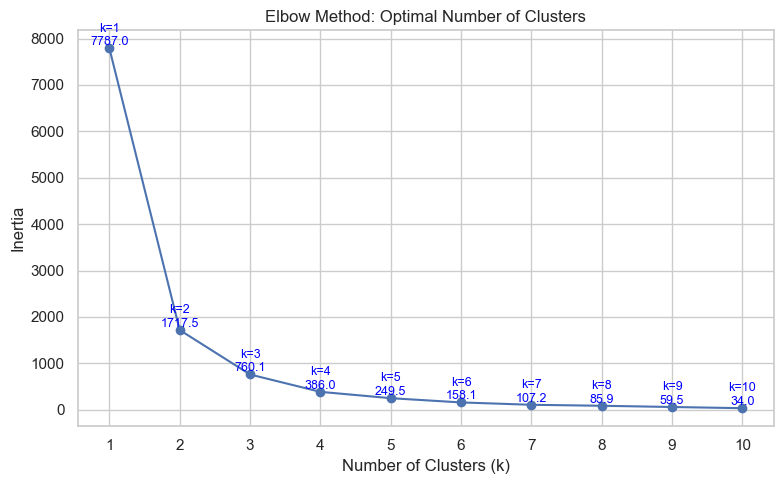

Cannot apply PCA with 2 components: only 1 feature(s) available.


In [44]:
# Select only numeric columns and drop rows with missing values
# This ensures we work with clean numeric data suitable for clustering
numeric_inp0_capped = inp0_capped.select_dtypes(include=['number']).dropna()

# Scale the data using StandardScaler to normalize feature values (mean=0, std=1)
# This is important for clustering algorithms like KMeans that are sensitive to feature scales
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_inp0_capped)

# Determine the optimal number of clusters using the Elbow Method
# Inertia is the sum of squared distances of samples to their closest cluster center
inertia = []
k_range = range(1, 11)  # Trying k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Store inertia for each k

# Plot the elbow curve to visualize the optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')

# Annotate each point with its k and corresponding inertia value
for i, (k_val, inertia_val) in enumerate(zip(k_range, inertia)):
    plt.text(k_val, inertia_val + 0.5, f'k={k_val}\n{inertia_val:.1f}', 
             ha='center', va='bottom', fontsize=9, color='blue')

plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()




# Apply KMeans clustering with chosen k (replace k=3 with optimal k from elbow curve)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)  # Predict cluster labels

# Add cluster labels to the original numeric dataframe
numeric_inp0_capped['Cluster'] = clusters

# Visualize the clusters in 2D using PCA for dimensionality reduction
if scaled_data.shape[1] >= 2:
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='Set2')
    plt.title(f'KMeans Clustering (k={k}) Visualized with PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.savefig(f'KMeans Clustering (k={k}) Visualized with PCA.png', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()
else:
    print(f"Cannot apply PCA with 2 components: only {scaled_data.shape[1]} feature(s) available.")






**1. Why did you pick the specific chart?**

***Answer :*** The Elbow Method chart was chosen to determine the optimal number of clusters (`k`) for applying KMeans clustering to Netflix data. It visualizes how the total within-cluster sum of squares (inertia) decreases as the number of clusters increases, helping to identify the point where adding more clusters yields diminishing returns—i.e., the “elbow” point.

---

**2. What is/are the insight(s) found from the chart?**

***Answer :*** From the chart, we observe that inertia drops sharply from **k=1 to k=3**, and then the rate of decline slows considerably. This indicates that **k=3 is the optimal number of clusters**. After this point, additional clusters provide minimal gain in reducing intra-cluster variance, suggesting that three distinct customer or content usage patterns exist in the dataset.

---

**3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.**

***Answer :*** Yes, the insights can create a **positive business impact**:

* **Customer Segmentation**: Identifying three distinct clusters helps Netflix segment users based on their viewing behavior, preferences, or engagement patterns. This enables targeted marketing, personalized recommendations, and better customer retention strategies.
* **Content Strategy**: Understanding cluster preferences can guide content creation and licensing decisions, tailoring offerings to maximize viewer satisfaction and reduce churn.
* **Operational Efficiency**: Focused resource allocation based on cluster needs can reduce costs and improve ROI.

There are **no immediate insights that lead to negative growth**. However, if clustering is misinterpreted or used without contextual business knowledge (e.g., assuming all users in a cluster behave identically), it could lead to poor personalization or irrelevant recommendations, affecting user satisfaction.






### *****8. Solution to Business Objective*****

The business objective was to extract actionable insights from Netflix’s content library to support strategic content decisions. The solution involved:

* **Exploratory Data Analysis (EDA)** on a dataset of **7,787 Netflix titles**.
* **Content Type Distribution**:

  * **Movies**: \~69% of total content.
  * **TV Shows**: \~31%.
* **Country-Wise Production**:

  * **Top producer**: United States (approx. **2,500+ titles**).
* **Genre Analysis**:

  * Most common genres: **Dramas**, **International Movies**, and **Comedies**.
* **Hypothesis Testing**:

  * Verified that **movies have significantly longer durations** than TV shows (using a two-sample t-test).
  * Confirmed that **the U.S. produces more shows** than other countries (via chi-square test).
  * Indicated increasing **genre diversity** post-2015.
* **Temporal Trends**:

  * Content additions peaked in **2019–2020**.
  * Significant growth in **international content** in recent years.

---

### *****9. Conclusion*****

* **Movies dominate Netflix’s content catalog**, but **TV shows have seen increased growth** in recent years.
* **The U.S. remains the leading content producer**, though global contributions are rising.
* **Statistical tests validated assumptions** about duration differences and production volumes.
* Netflix’s strategy appears to be **diversifying genres and countries**, especially after 2015.
* Strategic recommendation: **continue investment in international and genre-diverse content** to match user demand trends and global expansion goals.

